In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math

plt.style.use('deeplearning.mplstyle')
np.set_printoptions(precision=2)

# 2 Problem Statement

In [2]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [ ]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

In [5]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


## 3.2 Single Prediction, vector

In [46]:
def f_wb(x, w, b):
    return np.dot(x,w)+b

In [ ]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = f_wb(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

# 4 Self practice: Compute Cost With Multiple Variable

In [58]:
# cost function
def compute_cost(x, y, w, b):
    sum_diff = 0
    for i in range(len(x)):
        y_pred = f_wb(x[i], w, b)
        sum_diff += (y_pred - y[i])**2
    return sum_diff/(2.0*len(x))

In [ ]:
# w = [1, 2, 3, 4]
# b = 2
w = [0,0,0,0]
b = 0
print(X_train[0])
print(f_wb(X_train[0], w,b))
compute_cost(X_train, y_train, w, b)

# 5 Self practice: Gradient Descent With Multiple Variables

In [61]:
'''
def compute_gradient(X, y, w, b): 
    dw = np.zeros_like(w)
    db = 0.
    m = X.shape[0]
    n = X.shape[1]
    for i in range(n):
        dw[i] = 0
        for j in range(m):
            y_pred = np.dot(X[j], w) + b
            # db += (y_pred - y[j])     # WRONG
            if i ==0:
                db += (y_pred - y[j])
            dw[i] += (y_pred - y[j]) * X[j,i]
        dw[i] /= m
    db /= m
    return (dw,db)
'''
def update_wb(X,y,w,b):
    m,n = X.shape
    sum_dw = np.zeros(n)
    sum_db = 0.
    for i in range(m):
        diff = f_wb(X[i],w,b) - y[i]
        for j in range(n):
            # 根据这一行数据更新dw1, dw2, dw3, .... dwn
            sum_dw[j] += diff * X[i,j]
        sum_db += diff
    w_new = w - alpha * sum_dw/ m
    b_new = b - alpha * sum_db/ m
    return w_new, b_new

In [81]:
# gradient descent
def derivative(x,y,w,b):
    global iterations
    lastcost = 1e9
    iteration = 0
    while True:
        cost = compute_cost(x,y,w,b)
        print(f"iter:{iteration:5}: w={w}, b={b}, cost={cost}")
        if abs(lastcost-cost)<neg or iteration>=iterations:
            break
        else:
            lastcost = cost
            iteration +=1

        w,b = update_wb(x,y,w,b)
    return w,b

In [82]:
w = np.zeros(X_train[0].shape)
b = 0.
alpha = 5.0e-7
neg = 1e-3
iterations =3000
# w = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
# b = 785.1811367994083
w_final, b_final = derivative(X_train, y_train, w, b)

print(f"b,w found by gradient descent: {b_final:0.9f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")


iter:    0: w=[0. 0. 0. 0.], b=0.0, cost=49518.0
iter:    1: w=[2.41e-01 5.59e-04 1.84e-04 6.03e-03], b=0.000145, cost=2529.4629522316336
iter:    2: w=[1.95e-01 4.54e-04 1.34e-04 4.78e-03], b=0.00011402564683333335, cost=765.8336829952988
iter:    3: w=[2.04e-01 4.79e-04 1.30e-04 4.94e-03], b=0.00011714368908454538, cost=699.6290280210446
iter:    4: w=[2.02e-01 4.78e-04 1.17e-04 4.82e-03], b=0.00011365700305146082, cost=697.1337425623095
iter:    5: w=[2.02e-01 4.82e-04 1.06e-04 4.75e-03], b=0.00011145001540926668, cost=697.0296591788104
iter:    6: w=[2.02e-01 4.85e-04 9.45e-05 4.68e-03], b=0.00010899524267421965, cost=697.0153256006653
iter:    7: w=[2.02e-01 4.88e-04 8.30e-05 4.61e-03], b=0.0001065886107052529, cost=697.0043615139087
iter:    8: w=[2.02e-01 4.92e-04 7.15e-05 4.54e-03], b=0.00010417278852237807, cost=696.9935248096691
iter:    9: w=[2.02e-01 4.95e-04 6.00e-05 4.46e-03], b=0.00010175888309386385, cost=696.9826938019223
iter:   10: w=[2.02e-01 4.98e-04 4.86e-05 4.39e

# 4 Compute Cost With Multiple Variables

In [74]:
def compute_cost(X,y,w,b):
    #print(X.shape) # (行数，列数)
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        cost += (np.dot(X[i], w)+b - y[i]) ** 2
    return cost/(2*m)

In [ ]:
print(X_train)
compute_cost(X_train, y_train, w_init, b_init)

# 5 Gradient Descent With Multiple Variables

## 5.1 Compute Gradient with Multiple Variables

In [75]:
def compute_gradient(X, y, w, b): 
    dw = np.zeros_like(w)
    db = 0.
    m = X.shape[0]
    n = X.shape[1]
    for i in range(n):
        dw[i] = 0
        for j in range(m):
            y_pred = np.dot(X[j], w) + b
            # db += (y_pred - y[j])     # wrong
            if i ==0:
                db += (y_pred - y[j])
            dw[i] += (y_pred - y[j]) * X[j,i]
        dw[i] /= m
    db /= m
    return db, dw

In [70]:
#Compute and display gradient 
#print(X_train, y_train, w_init, b_init)
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.673925169143331e-06
dj_dw at initial w,b: 
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


## 5.2 Gradient Descent With Multiple Variables

In [76]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)
        print(f"{i:5d}  w={w}, b={b}, cost={cost_function(X,y,w,b)}")

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<100000:
            J_history.append(cost_function(X,y,w,b))
        
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}  ")
        
    return w, b, J_history

In [78]:
initial_w = np.zeros_like(w_init)
initial_b = 0.

iterations = 3000
alpha = 5.0e-7

w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.9f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

    0  w=[0. 0. 0. 0.], b=0.0, cost=49518.0
Iteration    0: Cost  2529.46  
    1  w=[2.41e-01 5.59e-04 1.84e-04 6.03e-03], b=0.000145, cost=2529.4629522316304
    2  w=[1.95e-01 4.54e-04 1.34e-04 4.78e-03], b=0.00011402564683333336, cost=765.8336829952988
    3  w=[2.04e-01 4.79e-04 1.30e-04 4.94e-03], b=0.00011714368908454539, cost=699.6290280210446
    4  w=[2.02e-01 4.78e-04 1.17e-04 4.82e-03], b=0.00011365700305146083, cost=697.1337425623095
    5  w=[2.02e-01 4.82e-04 1.06e-04 4.75e-03], b=0.00011145001540926669, cost=697.0296591788104
    6  w=[2.02e-01 4.85e-04 9.45e-05 4.68e-03], b=0.00010899524267421966, cost=697.0153256006653
    7  w=[2.02e-01 4.88e-04 8.30e-05 4.61e-03], b=0.00010658861070525292, cost=697.0043615139087
    8  w=[2.02e-01 4.92e-04 7.15e-05 4.54e-03], b=0.00010417278852237808, cost=696.9935248096691
    9  w=[2.02e-01 4.95e-04 6.00e-05 4.46e-03], b=0.00010175888309386385, cost=696.9826938019223
   10  w=[2.02e-01 4.98e-04 4.86e-05 4.39e-03], b=9.934474261349

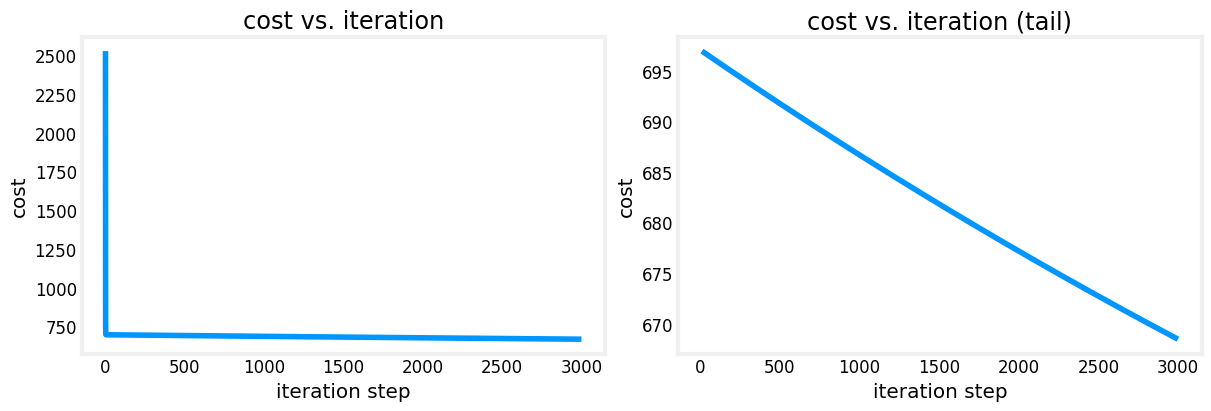

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist)
x = 10 + np.arange(len(J_hist[10:]))
#print(len(J_hist[100:]), np.arange(len(J_hist[100:])), x)

ax2.plot(x, J_hist[10:])
ax1.set_title("cost vs. iteration");    ax2.set_title("cost vs. iteration (tail)")
ax1.set_ylabel("cost");                 ax2.set_ylabel("cost")
ax1.set_xlabel("iteration step");       ax2.set_xlabel("iteration step")
plt.show()